<a href="https://colab.research.google.com/github/rubaasiri12/KAIMRC_HELATH_TECH/blob/main/Ruba_Asiri''s_MLForDMPredections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building and Evaluating Multiable Machine learning Models for Diabetes Predictions.**

##** implementation steps of an ML model**

1. Define the Problem
2. Collect Data
3. Prepare the Data
4. Choose a Model
5. Train the Model
6. Evaluate the Model

**Diabetes Dataset:**
https://www.kaggle.com/datasets/mathchi/diabetes-data-set



**Import Libraries:**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

**Step 1. Define the Problem:**

In [13]:
#Understand the data that you like to use (i.e. visit its corresponding Kaggle site) and define your problem verbally here
#The problem is prediction becuase it is Diabetics Vs. Non-Diabetics

**Step 2. Download your dataset of interest from Kaggle and load it as DataFrame**

In [14]:
from google.colab import files
uploaded = files.upload()  # choose diabetes.csv
df = pd.read_csv(list(uploaded.keys())[0])

print("Dataset Shape:", df.shape)
print(df.head())

Saving diabetes.csv to diabetes (1).csv
Dataset Shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Step 3. Prepare the Data:**

Analyse your data and preprocess if necessary. For example removing duplicates, handling missing values, standardazing values.

In [17]:
# Replace 0s in certain columns with median
cols_with_zeros = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age"]
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

# Features & Labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


/tmp/ipython-input-462366813.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [19]:
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**Step 4. Choose a Model to train**



* Logistics Regression
* Random Forest
* XGboost


In [22]:
#4. Logistic Regression (Baseline)
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


🔹 Logistic Regression
Accuracy: 0.7012987012987013
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# 5. Random Forest (Default)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🔹 Random Forest (Default)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest (Default)
Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.66      0.54      0.59        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [24]:
# 6. XGBoost (Default)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n🔹 XGBoost (Default)")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



🔹 XGBoost (Default)
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       100
           1       0.66      0.65      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:34:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Step 5. Train the Model**


In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Step 3.Part 2. Prepare the Data:** **Standardize features**

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 6. Evaluate the Model**

In [26]:
# 7. Hyperparameter Tuning - Random Forest
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_grid = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10, cv=5, scoring="accuracy", n_jobs=-1, random_state=42
)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)

print("\n🔹 Random Forest (Tuned)")
print("Best Parameters:", rf_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))


🔹 Random Forest (Tuned)
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy: 0.7597402597402597


In [27]:
# 8. Hyperparameter Tuning - XGBoost

xgb_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1]
}

xgb_grid = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    param_distributions=xgb_params,
    n_iter=10, cv=5, scoring="accuracy", n_jobs=-1, random_state=42
)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
y_pred_xgb_best = best_xgb.predict(X_test)

print("\n🔹 XGBoost (Tuned)")
print("Best Parameters:", xgb_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_best))


🔹 XGBoost (Tuned)
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Accuracy: 0.7467532467532467


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:35:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


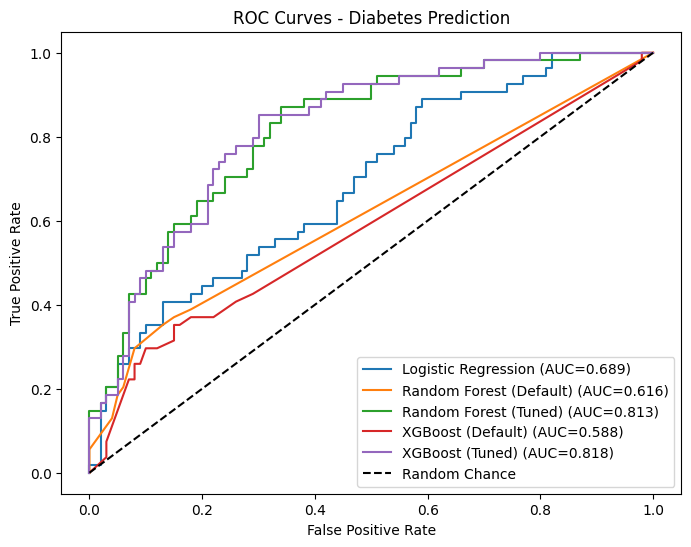

In [28]:
# 9. ROC Curves & AUC
models = {
    "Logistic Regression": lr_model,
    "Random Forest (Default)": rf_model,
    "Random Forest (Tuned)": best_rf,
    "XGBoost (Default)": xgb_model,
    "XGBoost (Tuned)": best_xgb
}

plt.figure(figsize=(8, 6))
for name, mdl in models.items():
    y_prob = mdl.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.title("ROC Curves - Diabetes Prediction")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()